In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("C:\\Users\\Nishanth S\\Downloads\\archive (4)\\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


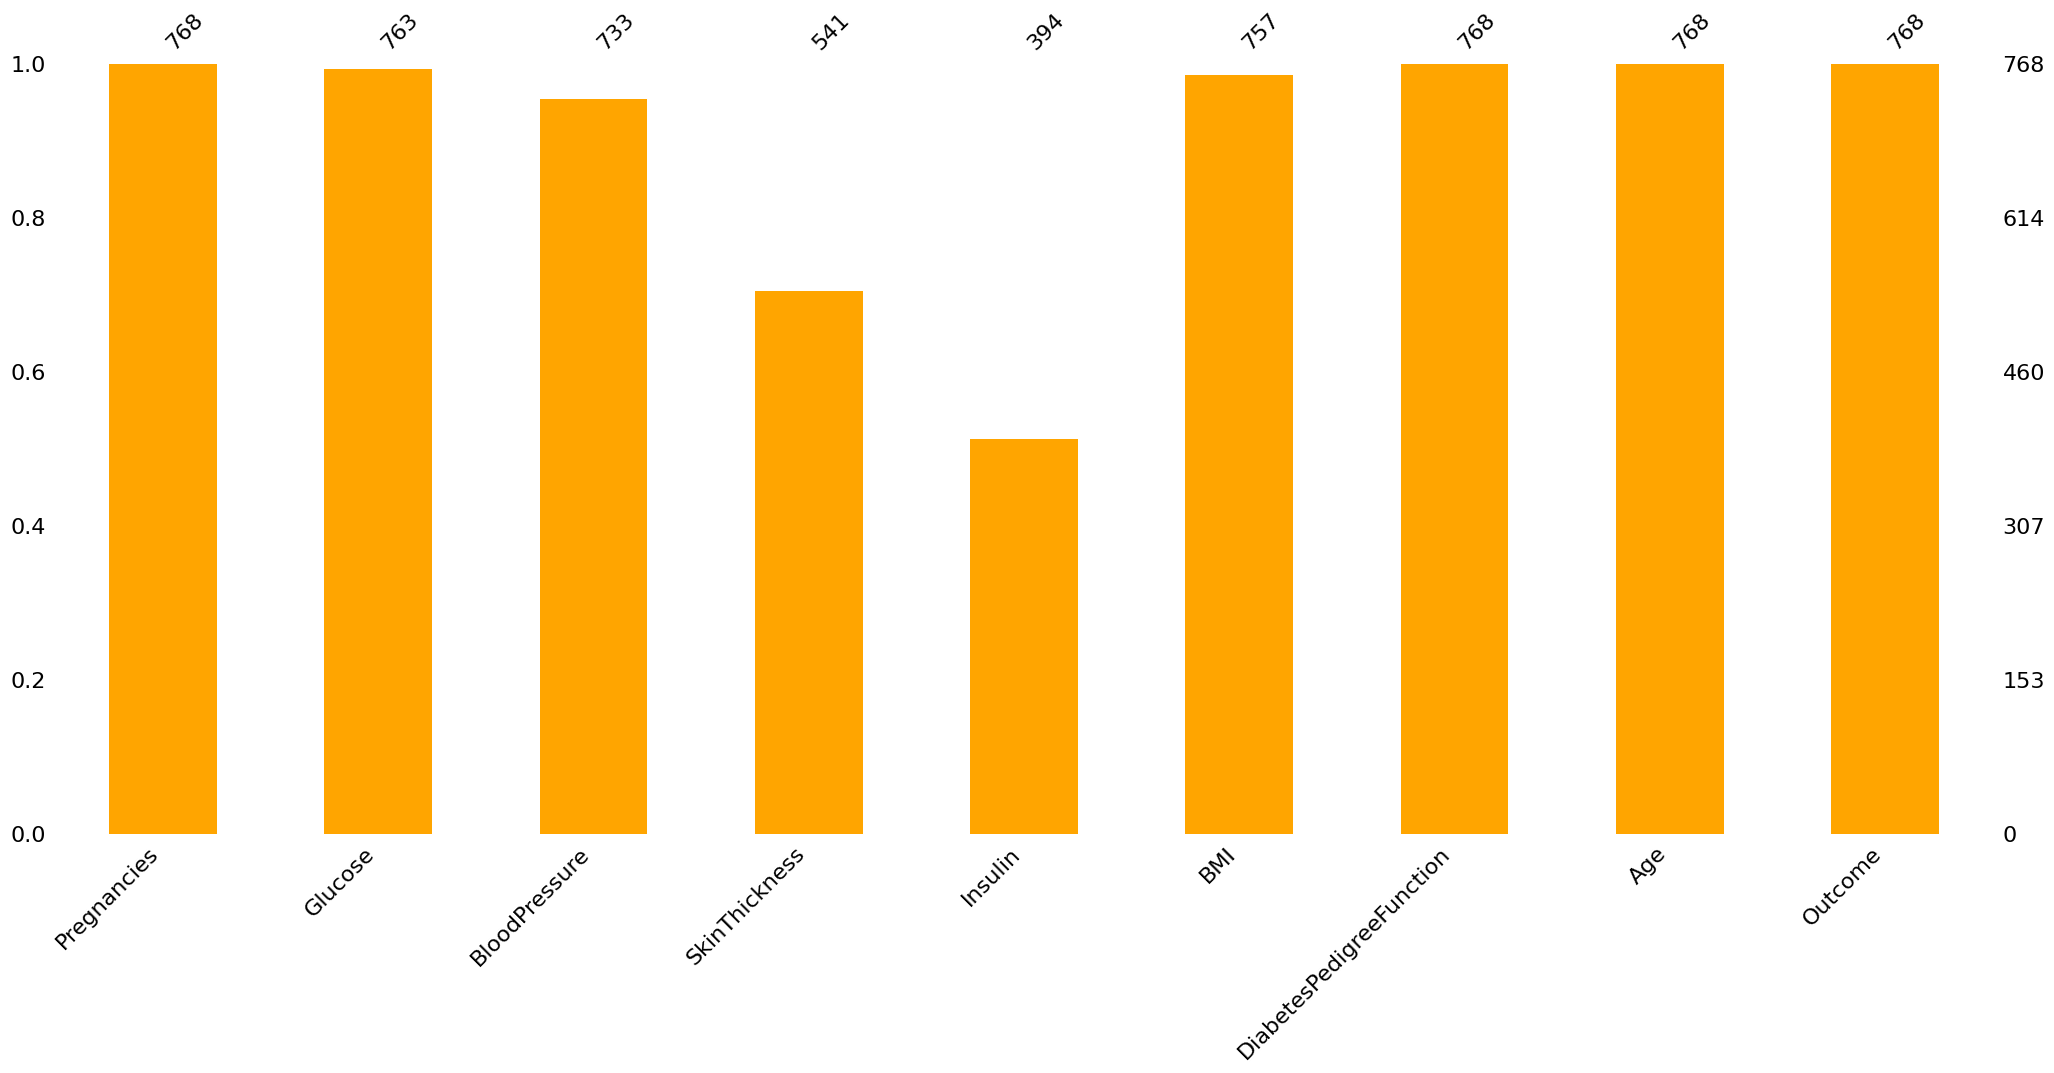

In [5]:
import missingno as msno
msno.bar(data, color="orange");

In [6]:
def median_target(var):
    temp = data[data[var].notnull()]
    temp = temp[[var,'Outcome']].groupby(["Outcome"])[[var]].median().reset_index()
    return temp

In [7]:
columns = data.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = median_target(i)[i][0]
    data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = median_target(i)[i][1]

In [8]:
print(data.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6    148.0           72.0           35.0    169.5  33.6                     0.627   50        1
1              1     85.0           66.0           29.0    102.5  26.6                     0.351   31        0
2              8    183.0           64.0           32.0    169.5  23.3                     0.672   32        1
3              1     89.0           66.0           23.0     94.0  28.1                     0.167   21        0
4              0    137.0           40.0           35.0    168.0  43.1                     2.288   33        1
5              5    116.0           74.0           27.0    102.5  25.6                     0.201   30        0
6              3     78.0           50.0           32.0     88.0  31.0                     0.248   26        1
7             10    115.0           70.0           27.0    102.5  35.3                     0.134   29        0
8

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
x=data.drop("Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47


In [11]:
y=data.Outcome

In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)


In [14]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score
y_pred_lr=lr.predict(x_test)
accuracy_score(y_test,y_pred_lr)


0.76953125

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)


DecisionTreeClassifier()

In [18]:
y_pred_dtc=dtc.predict(x_test)
accuracy_score(y_test,y_pred_dtc)

0.84765625

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_dtc)

array([[152,  19],
       [ 20,  65]], dtype=int64)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)


RandomForestClassifier(random_state=0)

In [21]:
y_pred_rfc=rfc.predict(x_test)
accuracy_score(y_test,y_pred_rfc)

0.9140625

In [22]:
confusion_matrix(y_test,y_pred_rfc)

array([[161,  10],
       [ 12,  73]], dtype=int64)

In [23]:
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))


1.0
0.9140625


In [24]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)


SVC(kernel='linear')

In [25]:
y_pred_svc=svc.predict(x_test)
accuracy_score(y_test,y_pred_svc)


0.76953125

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)


KNeighborsClassifier()

In [27]:
y_pred_knc=knc.predict(x_test)
accuracy_score(y_test,y_pred_knc)

0.81640625

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [29]:
y_pred_gnb=gnb.predict(x_test)
accuracy_score(y_test,y_pred_gnb)

0.765625

In [30]:
from sklearn.ensemble import AdaBoostClassifier
Adamodel=AdaBoostClassifier(rfc,learning_rate=2)
model=Adamodel.fit(x_train,y_train)


In [31]:
y_pred_model=model.predict(x_test)
accuracy_score(y_test,y_pred_model)

0.90234375

In [32]:
confusion_matrix(y_test,y_pred_model)

array([[159,  12],
       [ 13,  72]], dtype=int64)

In [33]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(rfc,n_estimators=500,max_samples=100,bootstrap=True,n_jobs=1,oob_score=True,max_features=0.7,random_state=0)
bg.fit(x_train,y_train)
y_pred_bg=bg.predict(x_test)
accuracy_score(y_test,y_pred_bg)


0.9140625

In [34]:
print(accuracy_score(y_train, rfc.predict(x_train)))

ran_clf_acc = accuracy_score(y_test, y_pred_rfc)
print(ran_clf_acc)

1.0
0.9140625


In [35]:
print(accuracy_score(y_train, bg.predict(x_train)))

ran_clf_acc = accuracy_score(y_test, y_pred_bg)
print(ran_clf_acc)

0.900390625
0.9140625


In [36]:
print(bg.score(x_train,y_train))
print(bg.score(x_test,y_test))

0.900390625
0.9140625


In [37]:
confusion_matrix(y_test,y_pred_bg)

array([[163,   8],
       [ 14,  71]], dtype=int64)

In [38]:
print(accuracy_score(y_train, knc.predict(x_train)))

ran_clf_acc = accuracy_score(y_test, y_pred_knc)
print(ran_clf_acc)

0.861328125
0.81640625


In [39]:
import pickle
filename='diabetes.sav'
pickle.dump(bg,open(filename,'wb'))

In [40]:
model=pickle.load(open("C:\\Users\\Nishanth S\\Desktop\\class\\streamlit project_MDP\\diabetes.sav",'rb'))
model

BaggingClassifier(estimator=RandomForestClassifier(random_state=0),
                  max_features=0.7, max_samples=100, n_estimators=500, n_jobs=1,
                  oob_score=True, random_state=0)

In [41]:
pred=model.predict([[1,85.0,66.0,29.0,102.5,26.6,0.351,31]])

In [42]:
pred

array([1], dtype=int64)

In [44]:
pred_1=model.predict(ss.transform([[1,85.0,66.0,29.0,102.5,26.6,0.351,31]]))
pred_1

c:\Users\Nishanth S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)